In [48]:
%%time
# Check GPU type
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
CPU times: user 2.94 ms, sys: 1.99 ms, total: 4.93 ms
Wall time: 107 ms


In [2]:
%%time
# @title Default title text
# Install ultralytics
!pip -q install  ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.7 MB/s eta 0:00:00
CPU times: user 1.07 s, sys: 173 ms, total: 1.24 s
Wall time: 2min 11s


In [3]:
%%time
# Download the data from IBM cloud ..
!wget https://mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud/dataset.zip

--2025-04-16 07:54:10--  https://mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud/dataset.zip
Resolving mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud (mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud)... 169.63.118.96
Connecting to mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud (mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud)|169.63.118.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10129066154 (9.4G) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   9.43G   138MB/s    in 1m 44s  

2025-04-16 07:55:55 (93.2 MB/s) - ‘dataset.zip’ saved [10129066154/10129066154]

CPU times: user 1.04 s, sys: 228 ms, total: 1.27 s
Wall time: 1min 44s


In [4]:
%%time
# mount drive
from google.colab import drive
drive.mount("drive")
# !ls /content/drive/MyDrive



Mounted at drive
CPU times: user 1.23 s, sys: 210 ms, total: 1.44 s
Wall time: 26.5 s


In [5]:
%%time
# Import libraries ..
import pandas as pd
import os
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
import multiprocessing
import numpy as np
from PIL import Image
import numpy as np
from sklearn.model_selection import KFold
import shutil
import time
import logging
from datetime import datetime
# !ls /content

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
CPU times: user 8.7 s, sys: 2.06 s, total: 10.8 s
Wall time: 19.1 s


In [6]:
%%time
# INPUT_DIRS
INPUT_DATA_DIR = Path('drive/MyDrive/COCOA-ANALYSIS')

CPU times: user 30 µs, sys: 7 µs, total: 37 µs
Wall time: 41.7 µs


In [7]:
%%time
os.listdir(INPUT_DATA_DIR)

CPU times: user 3.3 ms, sys: 275 µs, total: 3.58 ms
Wall time: 813 ms


['SampleSubmission.csv',
 'Test.csv',
 'Train.csv',
 'yolov8_finetuning parameters.gdoc',
 '20250406_Cocoa_Disease_Starter_Muwonge_Lawrence_Notebook.ipynb',
 'CROSS VALIDATION_IMPORTANCE.gdoc',
 '20250415_cross-validation_and_finetuning_Notebook.ipynb']

In [8]:
%%time
## Drop the Folder if it already exists ..
DATASETS_DIR = Path('dataset')
DATASETS_DIR

CPU times: user 33 µs, sys: 7 µs, total: 40 µs
Wall time: 43.4 µs


PosixPath('dataset')

In [9]:
%%time
# Image & labels directory ..
TRAIN_IMAGES_DIR = DATASETS_DIR / 'images' / 'train'
TRAIN_LABELS_DIR = DATASETS_DIR / 'labels'/ 'train'
TEST_IMAGES_DIR = DATASETS_DIR / 'images' / 'test'
VAL_IMAGES_DIR = DATASETS_DIR / 'images' /'val'
VAL_LABELS_DIR = DATASETS_DIR / 'labels' /'val'

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 78 µs


In [10]:
%%time
# Check if DATASETS_DIR exists, if it does delete it and recreate it
for DIR in [TRAIN_IMAGES_DIR, VAL_IMAGES_DIR, TEST_IMAGES_DIR, VAL_LABELS_DIR, DATASETS_DIR]:
  if DIR.exists():
    shutil.rmtree(DIR)
  DIR.mkdir(parents=True, exist_ok = True)

CPU times: user 1.87 ms, sys: 779 µs, total: 2.65 ms
Wall time: 2.17 ms


In [11]:
%%time
# Unpack the 'dataset.zip'
# shutil.unpack_archive(INPUT_DATA_DIR / 'dataset.zip', DATASETS_DIR)

# unpack the changed path of the dataset and save it in the created directory DATASETS_DIR
shutil.unpack_archive('/content/dataset.zip', DATASETS_DIR)


CPU times: user 37.6 s, sys: 27.5 s, total: 1min 5s
Wall time: 2min 16s


In [12]:
%%time

def count_files(directory):
    total_files = 0
    for root, _, files in os.walk(directory):
        total_files += len(files)
    return total_files

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


In [13]:
%%time

## Count the number files in TRAIN_IMAGES_DIR
num_train_images = count_files(TRAIN_IMAGES_DIR)
print(f"There are {num_train_images} in {TRAIN_IMAGES_DIR}")

There are 5529 in dataset/images/train
CPU times: user 4.91 ms, sys: 3.96 ms, total: 8.87 ms
Wall time: 8.24 ms


In [14]:
%%time
## Count the number of files in TRAIN_LABELS_DIR
num_train_labels = count_files(TRAIN_LABELS_DIR)
print(f"There are {num_train_labels} in {TRAIN_LABELS_DIR}")

There are 5529 in dataset/labels/train
CPU times: user 1.75 ms, sys: 5 ms, total: 6.75 ms
Wall time: 6.53 ms


In [15]:
%%time
## Get the set of all the stems of the images in TRAIN_IMAGES_DIR
train_images_stems = set([str(Path(name).stem) for name in os.listdir(TRAIN_IMAGES_DIR)])
len(train_images_stems)

CPU times: user 40.1 ms, sys: 3.22 ms, total: 43.4 ms
Wall time: 52.5 ms


5529

In [16]:
%%time
## Get the set of all the stems of the labes in TRAIN_LABELS_DIR
train_labels_stems = set([str(Path(name).stem) for name in os.listdir(TRAIN_LABELS_DIR)])
len(train_labels_stems)

CPU times: user 26.3 ms, sys: 1.79 ms, total: 28.1 ms
Wall time: 28.6 ms


5529

In [17]:
%%time
# Check that the two sets are identitical
train_images_stems == train_labels_stems

CPU times: user 972 µs, sys: 0 ns, total: 972 µs
Wall time: 982 µs


True

In [18]:
TRAIN_IMAGES_DIR.absolute()

PosixPath('/content/dataset/images/train')

In [19]:
%%time
# Load train and test files
train = pd.read_csv(INPUT_DATA_DIR / 'Train.csv')
test = pd.read_csv(INPUT_DATA_DIR / 'Test.csv')
ss = pd.read_csv(INPUT_DATA_DIR / 'SampleSubmission.csv')

CPU times: user 56.6 ms, sys: 11.3 ms, total: 67.9 ms
Wall time: 892 ms


In [20]:
%%time
## Sample submission file
ss.head()

CPU times: user 1.2 ms, sys: 123 µs, total: 1.32 ms
Wall time: 1.36 ms


,Image_ID,class,confidence,ymin,xmin,ymax,xmax
0,ID_Genxyu.jpg,healthy,0.5,100,100,100,100
1,ID_svY6TG.jpg,healthy,0.5,100,100,100,100
2,ID_d0gpda.jpg,healthy,0.5,100,100,100,100
3,ID_frWmBT.jpg,healthy,0.5,100,100,100,100
4,ID_TaRW6o.jpg,healthy,0.5,100,100,100,100


In [21]:
%%time
train.head()

CPU times: user 197 µs, sys: 0 ns, total: 197 µs
Wall time: 210 µs


,Image_ID,class,confidence,ymin,xmin,ymax,xmax,class_id,ImagePath
0,ID_nBgcAR.jpg,healthy,1.0,75.0,15.0,162.0,195.0,2,dataset/images/train/ID_nBgcAR.jpg
1,ID_nBgcAR.jpg,healthy,1.0,58.0,1.0,133.0,171.0,2,dataset/images/train/ID_nBgcAR.jpg
2,ID_nBgcAR.jpg,healthy,1.0,42.0,29.0,377.0,349.0,2,dataset/images/train/ID_nBgcAR.jpg
3,ID_Kw2v8A.jpg,healthy,1.0,112.0,124.0,404.0,341.0,2,dataset/images/train/ID_Kw2v8A.jpg
4,ID_Kw2v8A.jpg,healthy,1.0,148.0,259.0,413.0,412.0,2,dataset/images/train/ID_Kw2v8A.jpg


In [22]:
%%time
train['class'].unique()

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.38 ms


array(['healthy', 'anthracnose', 'cssvd'], dtype=object)

In [23]:
%%time
train['class_id'].unique()

CPU times: user 1.6 ms, sys: 0 ns, total: 1.6 ms
Wall time: 1.36 ms


array([2, 0, 1])

In [24]:
%%time
train[['class', 'class_id']].value_counts()

CPU times: user 11.2 ms, sys: 183 µs, total: 11.4 ms
Wall time: 11.4 ms


,,count
class,class_id,
healthy,2,4279
cssvd,1,3223
anthracnose,0,2271
cssvd,0,18
healthy,1,1


In [25]:
%%time
class_map = {cls: i for i, cls in enumerate(sorted(train['class'].unique().tolist()))}
class_map

CPU times: user 953 µs, sys: 979 µs, total: 1.93 ms
Wall time: 1.87 ms


{'anthracnose': 0, 'cssvd': 1, 'healthy': 2}

In [26]:
%%time
# Strip any spacing from the class item and make sure that it is a str
train['class'] = train['class'].str.strip()

# Map {'healthy': 2, 'cssvd': 1, anthracnose: 0}
train['class_id'] = train['class'].map(class_map)

CPU times: user 5.84 ms, sys: 0 ns, total: 5.84 ms
Wall time: 5.86 ms


In [27]:
%%time
train[['class', 'class_id']].value_counts()

CPU times: user 5.09 ms, sys: 1.03 ms, total: 6.12 ms
Wall time: 5.85 ms


,,count
class,class_id,
healthy,2,4280
cssvd,1,3241
anthracnose,0,2271


In [28]:
%%time
# Number of unique images path
train['ImagePath'].nunique()

CPU times: user 3.07 ms, sys: 15 µs, total: 3.09 ms
Wall time: 3.07 ms


5529

In [29]:
%%time
# Split the train dataset into train_df & val_df
train_names, val_names = train_test_split(train['Image_ID'].unique(), test_size=0.15, random_state=42)

train_df = train[train['Image_ID'].isin(train_names)]
val_df = train[train['Image_ID'].isin(val_names)]

CPU times: user 21.5 ms, sys: 847 µs, total: 22.3 ms
Wall time: 46.9 ms


In [30]:
%%time
train_df.head()

CPU times: user 292 µs, sys: 0 ns, total: 292 µs
Wall time: 297 µs


,Image_ID,class,confidence,ymin,xmin,ymax,xmax,class_id,ImagePath
0,ID_nBgcAR.jpg,healthy,1.0,75.0,15.0,162.0,195.0,2,dataset/images/train/ID_nBgcAR.jpg
1,ID_nBgcAR.jpg,healthy,1.0,58.0,1.0,133.0,171.0,2,dataset/images/train/ID_nBgcAR.jpg
2,ID_nBgcAR.jpg,healthy,1.0,42.0,29.0,377.0,349.0,2,dataset/images/train/ID_nBgcAR.jpg
3,ID_Kw2v8A.jpg,healthy,1.0,112.0,124.0,404.0,341.0,2,dataset/images/train/ID_Kw2v8A.jpg
4,ID_Kw2v8A.jpg,healthy,1.0,148.0,259.0,413.0,412.0,2,dataset/images/train/ID_Kw2v8A.jpg


In [31]:
%%time
train_df.shape, val_df.shape, test.shape

CPU times: user 26 µs, sys: 15 µs, total: 41 µs
Wall time: 45.1 µs


((8236, 9), (1556, 9), (1626, 9))

In [32]:
%%time
ss.head()

CPU times: user 157 µs, sys: 0 ns, total: 157 µs
Wall time: 163 µs


,Image_ID,class,confidence,ymin,xmin,ymax,xmax
0,ID_Genxyu.jpg,healthy,0.5,100,100,100,100
1,ID_svY6TG.jpg,healthy,0.5,100,100,100,100
2,ID_d0gpda.jpg,healthy,0.5,100,100,100,100
3,ID_frWmBT.jpg,healthy,0.5,100,100,100,100
4,ID_TaRW6o.jpg,healthy,0.5,100,100,100,100


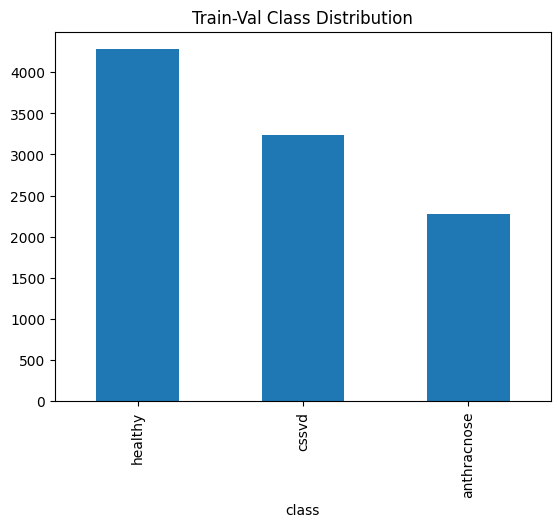

CPU times: user 273 ms, sys: 10.1 ms, total: 284 ms
Wall time: 441 ms


In [33]:
%%time
# Preview target distribution, seems there a class imbalance that needs to be handled
train['class'].value_counts().plot(kind='bar')
plt.title('Train-Val Class Distribution')
plt.show();

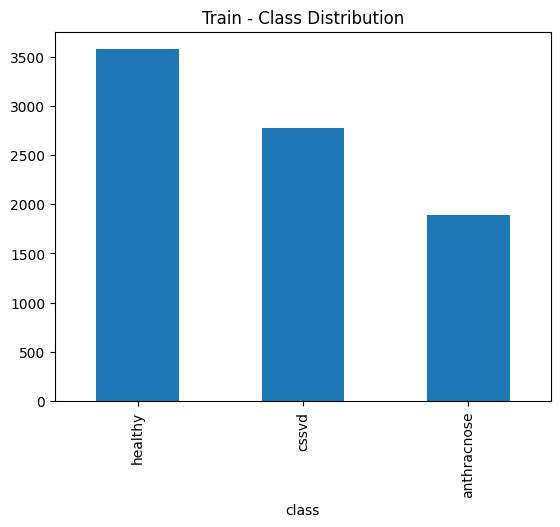

CPU times: user 149 ms, sys: 2.17 ms, total: 151 ms
Wall time: 152 ms


In [34]:
%%time
train_df['class'].value_counts().plot(kind='bar')
plt.title('Train - Class Distribution')
plt.show();

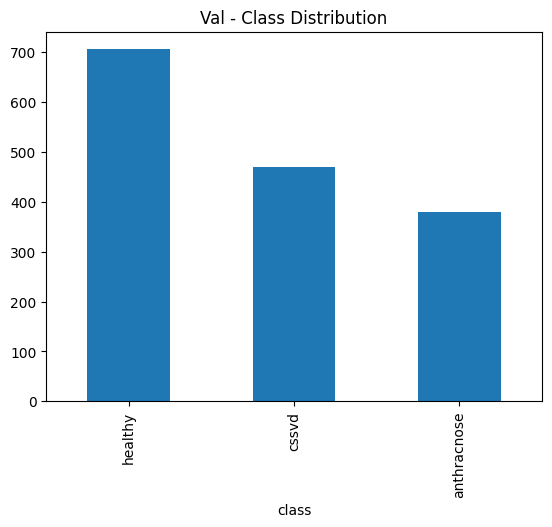

CPU times: user 210 ms, sys: 2.84 ms, total: 213 ms
Wall time: 223 ms


In [35]:
%%time
val_df['class'].value_counts().plot(kind='bar')
plt.title('Val - Class Distribution')
plt.show();

In [36]:
%%time
# Create a data.yaml file required by yolo ..
class_names = sorted(train['class'].unique().tolist())
num_classes = len(class_names)

data_yaml = {
    "path" : str(DATASETS_DIR.absolute()),
    'train': str(TRAIN_IMAGES_DIR.absolute()),
    'val': str(VAL_IMAGES_DIR.absolute()),
    'test': str(TEST_IMAGES_DIR.absolute()),
    'nc': num_classes,
    'names': class_names
}

yaml_path = 'data.yaml'
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

# Preview data yaml file
data_yaml

CPU times: user 1.54 ms, sys: 1.48 ms, total: 3.02 ms
Wall time: 2.77 ms


{'path': '/content/dataset',
 'train': '/content/dataset/images/train',
 'val': '/content/dataset/images/val',
 'test': '/content/dataset/images/test',
 'nc': 3,
 'names': ['anthracnose', 'cssvd', 'healthy']}

In [37]:
%%time
len(val_names), len(set(val_names))

CPU times: user 195 µs, sys: 0 ns, total: 195 µs
Wall time: 198 µs


(830, 830)

In [38]:
%%time
val_image_names = [str(Path(name).stem) for name in val_df['Image_ID'].unique()]

CPU times: user 4.13 ms, sys: 0 ns, total: 4.13 ms
Wall time: 3.99 ms


In [39]:
%%time
len(val_image_names)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


830

In [40]:
%%time
# list of images in TRAIN_IMAGES_DIR
images_in_train_dir = os.listdir(TRAIN_IMAGES_DIR)
len(images_in_train_dir), len(train_names)

CPU times: user 2.03 ms, sys: 2.82 ms, total: 4.85 ms
Wall time: 5.22 ms


(5529, 4699)

In [41]:
%%time
train_image_names = [str(Path(name).stem) for name in train['ImagePath'].unique()]

CPU times: user 41.6 ms, sys: 0 ns, total: 41.6 ms
Wall time: 47.1 ms


In [42]:
%%time
len(train_image_names)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


5529

In [43]:
%%time
# Check that VAL_IMAGES_DIR & VAL_LABELS_DIR exist if not create them
for DIR in [VAL_IMAGES_DIR, VAL_LABELS_DIR]:
  if not DIR.exists():
    DIR.mkdir(parents=True, exist_ok = True)

CPU times: user 185 µs, sys: 103 µs, total: 288 µs
Wall time: 296 µs


In [44]:
%%time
# Copy images in val_names to dataset/val and do the same with the labels
for image_name in tqdm(val_names):
    shutil.move(TRAIN_IMAGES_DIR / image_name, VAL_IMAGES_DIR / image_name)
    img_ext = image_name.split('.')[-1]
    label_name = image_name.replace(f'.{img_ext}', '.txt')
    shutil.move(TRAIN_LABELS_DIR / label_name, VAL_LABELS_DIR / label_name)

  0%|          | 0/830 [00:00<?, ?it/s]

CPU times: user 51.3 ms, sys: 65.9 ms, total: 117 ms
Wall time: 127 ms


In [45]:
%%time
# Plot some images and their bboxes to ensure the conversion was done correctly
def load_annotations(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        boxes.append((class_id, x_center, y_center, width, height))
    return boxes

# Function to plot an image with its bounding boxes
def plot_image_with_boxes(image_path, boxes):
    # Load the image
    image = np.array(Image.open(str(image_path)))


    # Get image dimensions
    h, w, _ = image.shape

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Plot each bounding box
    for box in boxes:
        class_id, x_center, y_center, width, height = box
        # Convert YOLO format to corner coordinates
        xmin = int((x_center - width / 2) * w)
        ymin = int((y_center - height / 2) * h)
        xmax = int((x_center + width / 2) * w)
        ymax = int((y_center + height / 2) * h)

        # Draw the bounding box
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                          edgecolor='red', facecolor='none', linewidth=2))
        plt.text(xmin, ymin - 10, f'Class {int(class_id)}', color='red', fontsize=8, weight='bold')

    plt.axis('off')
    plt.show()

# Directories for images and labels
IMAGE_DIR = TRAIN_IMAGES_DIR
LABEL_DIR = TRAIN_LABELS_DIR

# Plot a few images with their annotations
for image_name in os.listdir(IMAGE_DIR)[:5]:
    image_path = IMAGE_DIR / image_name
    img_ext = image_name.split('.')[-1]
    label_path = LABEL_DIR / (image_name.replace(f'.{img_ext}', '.txt'))

    if label_path.exists():
        boxes = load_annotations(label_path)
        print(f"Plotting {image_name} with {len(boxes)} bounding boxes.")
        plot_image_with_boxes(image_path, boxes)
    else:
        print(f"No annotations found for {image_name}.")


Output hidden; open in https://colab.research.google.com to view.

In [46]:
%%time

####################################### CROSS VALIDATION METHOD TEST  #####################################################

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%H:%M:%S'
)
logger = logging.getLogger('cocoa_cv')

# Define number of folds ..
k_folds = 3
logger.info(f"Starting {k_folds}-fold cross-validation")
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Get all unique image IDs ..
all_images = train['Image_ID'].unique()
logger.info(f"Total unique images: {len(all_images)}")

# Dictionary to store validation results ..
cv_results = {}

# Perform k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(all_images)):
    fold_start_time = time.time()
    logger.info(f"\n{'='*50}")
    logger.info(f"STARTING FOLD {fold+1}/{k_folds}")
    logger.info(f"{'='*50}\n")

    # Split data
    train_images = all_images[train_idx]
    val_images = all_images[val_idx]

    logger.info(f"Train set size: {len(train_images)} images")
    logger.info(f"Validation set size: {len(val_images)} images")

    # Create dataframes
    train_df_fold = train[train['Image_ID'].isin(train_images)]
    val_df_fold = train[train['Image_ID'].isin(val_images)]

    logger.info(f"Class distribution in train fold {fold+1}:")
    for cls, count in train_df_fold['class'].value_counts().items():
        logger.info(f"  - {cls}: {count} instances")

    logger.info(f"Class distribution in validation fold {fold+1}:")
    for cls, count in val_df_fold['class'].value_counts().items():
        logger.info(f"  - {cls}: {count} instances")

    # Setup directories for this fold
    fold_dir = f"fold_{fold+1}"
    TRAIN_IMAGES_FOLD = DATASETS_DIR / 'images' / fold_dir / 'train'
    TRAIN_LABELS_FOLD = DATASETS_DIR / 'labels' / fold_dir / 'train'
    VAL_IMAGES_FOLD = DATASETS_DIR / 'images' / fold_dir / 'val'
    VAL_LABELS_FOLD = DATASETS_DIR / 'labels' / fold_dir / 'val'

    logger.info("Setting up directory structure...")

    # Create directories
    for DIR in [TRAIN_IMAGES_FOLD, TRAIN_LABELS_FOLD, VAL_IMAGES_FOLD, VAL_LABELS_FOLD]:
        if not DIR.exists():
            DIR.mkdir(parents=True, exist_ok=True)
            logger.info(f"Created directory: {DIR}")

    # Track copy statistics for debugging
    train_img_copied = 0
    train_img_missing = 0
    train_label_copied = 0
    train_label_missing = 0

    # Copy train images and labels
    logger.info("Copying training data...")
    for i, image_id in enumerate(train_df_fold['Image_ID'].unique()):
        if i % 100 == 0 and i > 0:
            logger.info(f"  - Copied {i}/{len(train_df_fold['Image_ID'].unique())} training images")

        # Handle images
        src_img = TRAIN_IMAGES_DIR / image_id
        dst_img = TRAIN_IMAGES_FOLD / image_id
        if src_img.exists():
            shutil.copy(src_img, dst_img)
            train_img_copied += 1
        else:
            train_img_missing += 1
            logger.warning(f"Training image not found: {src_img}")

        # Handle labels - convert image extension to .txt for label files
        label_id = image_id.rsplit('.', 1)[0] + '.txt'
        src_label = TRAIN_LABELS_DIR / label_id
        dst_label = TRAIN_LABELS_FOLD / label_id
        if src_label.exists():
            shutil.copy(src_label, dst_label)
            train_label_copied += 1
        else:
            train_label_missing += 1
            logger.warning(f"Training label not found: {src_label}")

    logger.info(f"Training data copy statistics:")
    logger.info(f"  - Images copied: {train_img_copied}")
    logger.info(f"  - Images missing: {train_img_missing}")
    logger.info(f"  - Labels copied: {train_label_copied}")
    logger.info(f"  - Labels missing: {train_label_missing}")

    # Track copy statistics for debugging
    val_img_copied = 0
    val_img_missing = 0
    val_label_copied = 0
    val_label_missing = 0

    # Copy validation images and labels
    logger.info("Copying validation data...")
    for i, image_id in enumerate(val_df_fold['Image_ID'].unique()):
        if i % 100 == 0 and i > 0:
            logger.info(f"  - Copied {i}/{len(val_df_fold['Image_ID'].unique())} validation images")

        # Handle images
        src_img = TRAIN_IMAGES_DIR / image_id
        dst_img = VAL_IMAGES_FOLD / image_id
        if src_img.exists():
            shutil.copy(src_img, dst_img)
            val_img_copied += 1
        else:
            val_img_missing += 1
            logger.warning(f"Validation image not found: {src_img}")

        # Handle labels - convert image extension to .txt for label files
        label_id = image_id.rsplit('.', 1)[0] + '.txt'
        src_label = TRAIN_LABELS_DIR / label_id
        dst_label = VAL_LABELS_FOLD / label_id
        if src_label.exists():
            shutil.copy(src_label, dst_label)
            val_label_copied += 1
        else:
            val_label_missing += 1
            logger.warning(f"Validation label not found: {src_label}")

    logger.info(f"Validation data copy statistics:")
    logger.info(f"  - Images copied: {val_img_copied}")
    logger.info(f"  - Images missing: {val_img_missing}")
    logger.info(f"  - Labels copied: {val_label_copied}")
    logger.info(f"  - Labels missing: {val_label_missing}")

    # Create data.yaml for this fold
    fold_data_yaml = {
        "path": str(DATASETS_DIR.absolute()),
        'train': str(TRAIN_IMAGES_FOLD.absolute()),
        'val': str(VAL_IMAGES_FOLD.absolute()),
        'test': str(TEST_IMAGES_DIR.absolute()),
        'nc': num_classes,
        'names': class_names
    }

    yaml_path = f'data_fold_{fold+1}.yaml'
    with open(yaml_path, 'w') as file:
        yaml.dump(fold_data_yaml, file, default_flow_style=False)
    logger.info(f"Created YAML configuration: {yaml_path}")

    # Log YAML contents for verification
    logger.info("YAML configuration contents:")
    for key, value in fold_data_yaml.items():
        logger.info(f"  - {key}: {value}")

    # Train model for this fold with enhanced augmentation
    logger.info(f"\nTraining model for fold {fold+1}...")
    logger.info(f"Training start time: {datetime.now().strftime('%H:%M:%S')}")

    model = YOLO('yolov8s.pt')  # Using small model for better accuracy
    logger.info("Model initialized, starting training...")

    # Store original stdout to restore after training
    import sys
    original_stdout = sys.stdout

    try:
        # Start timer for training
        train_start = time.time()

        # Train the model
        results = model.train(
            data=yaml_path,
            epochs=12,             # Increased epochs for better learning
            imgsz=640,             # Balanced image size
            batch=16,              # Adjust based on GPU
            device=0,
            patience=10,           # Early stopping patience
            augment=True,
            mosaic=1.0,            # Mosaic augmentation
            mixup=0.5,             # Mixup augmentation
            degrees=15.0,          # More rotation for field conditions
            scale=0.5,             # Scale variation
            shear=2.0,             # Shear augmentation
            hsv_h=0.1,             # Hue variation
            hsv_s=0.7,             # Saturation variation
            hsv_v=0.4,             # Brightness variation
            fliplr=0.5,            # Horizontal flip
            verbose=True,          # Enable verbose output
            name=f'fold_{fold+1}'
        )

        # End timer for training
        train_end = time.time()
        train_duration = (train_end - train_start) / 60  # in minutes
        logger.info(f"Training completed in {train_duration:.2f} minutes")

        # Validate the model with test-time augmentation
        logger.info(f"Validating model for fold {fold+1}...")
        val_results = model.val(augment=True)

        # Extract and log validation metrics
        map_50 = val_results.box.map50
        map_50_95 = val_results.box.map

        logger.info(f"Validation results for fold {fold+1}:")
        logger.info(f"  - mAP@0.5: {map_50:.4f}")
        logger.info(f"  - mAP@0.5:0.95: {map_50_95:.4f}")

        # Store results for later analysis
        cv_results[f'fold_{fold+1}'] = val_results

    except Exception as e:
        logger.error(f"Error during training fold {fold+1}: {str(e)}")
        import traceback
        logger.error(traceback.format_exc())
    finally:
        # Restore original stdout
        sys.stdout = original_stdout

    # Calculate and log fold duration
    fold_duration = (time.time() - fold_start_time) / 60  # in minutes
    logger.info(f"Fold {fold+1} completed in {fold_duration:.2f} minutes")

# Calculate and log cross-validation results ..
logger.info("\n" + "="*50)
logger.info("CROSS-VALIDATION SUMMARY")
logger.info("="*50)

# Log individual fold results ..
for fold in range(1, k_folds+1):
    fold_key = f'fold_{fold}'
    if fold_key in cv_results:
        logger.info(f"Fold {fold} mAP@0.5: {cv_results[fold_key].box.map50:.4f}")
        logger.info(f"Fold {fold} mAP@0.5:0.95: {cv_results[fold_key].box.map:.4f}")

# Calculate mean metrics ..
try:
    mean_map50 = np.mean([cv_results[f'fold_{i+1}'].box.map50 for i in range(k_folds) if f'fold_{i+1}' in cv_results])
    mean_map = np.mean([cv_results[f'fold_{i+1}'].box.map for i in range(k_folds) if f'fold_{i+1}' in cv_results])
    logger.info(f"\nMean mAP@0.5 across {k_folds} folds: {mean_map50:.4f}")
    logger.info(f"Mean mAP@0.5:0.95 across {k_folds} folds: {mean_map:.4f}")
except Exception as e:
    logger.error(f"Error calculating mean metrics: {str(e)}")

# Create ensemble predictions ..
logger.info("\n" + "="*50)
logger.info("CREATING ENSEMBLE PREDICTIONS")
logger.info("="*50)

ensemble_results = []
test_img_paths = [str(TEST_IMAGES_DIR / img) for img in os.listdir(TEST_IMAGES_DIR)]
logger.info(f"Found {len(test_img_paths)} test images")

# Run predictions with each model ..
for fold in range(1, k_folds+1):
    model_path = f'/content/runs/detect/fold_{fold}/weights/best.pt'
    if not os.path.exists(model_path):
        logger.warning(f"Model for fold {fold} not found at {model_path}")
        continue

    logger.info(f"Getting predictions from fold {fold} model")
    fold_model = YOLO(model_path)
    fold_preds = []

    # Process test images in batches with progress logging ..
    batch_size = 50
    num_batches = (len(test_img_paths) + batch_size - 1) // batch_size

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(test_img_paths))
        batch_paths = test_img_paths[start_idx:end_idx]

        logger.info(f"  - Processing batch {batch_idx+1}/{num_batches} ({start_idx} to {end_idx-1})")

        batch_results = []
        for img_path in batch_paths:
            # Use test-time augmentation for robust predictions ..
            results = fold_model(img_path, augment=True)
            batch_results.append(results)

        fold_preds.extend(batch_results)
        logger.info(f"  - Completed batch {batch_idx+1}/{num_batches}")

    ensemble_results.append(fold_preds)
    logger.info(f"Completed predictions for fold {fold}")

# Process ensemble results to create final submission ..
logger.info("\nProcessing ensemble predictions...")
all_data = []

# Process each test image ..
for i, img_path in enumerate(test_img_paths):
    if i % 100 == 0:
        logger.info(f"Processing ensemble results for image {i+1}/{len(test_img_paths)}")

    image_file = os.path.basename(img_path)

    # Collect detections from all models ..
    all_detections = []
    for fold_idx, fold_preds in enumerate(ensemble_results):
        # Skip if this fold doesn't have predictions (could happen if a fold failed)
        if fold_idx >= len(fold_preds) or i >= len(fold_preds):
            continue

        results = fold_preds[i]
        if results[0].boxes:
            boxes = results[0].boxes.xyxy.tolist()
            classes = results[0].boxes.cls.tolist()
            confidences = results[0].boxes.conf.tolist()

            for box, cls, conf in zip(boxes, classes, confidences):
                all_detections.append({
                    'box': box,
                    'class': int(cls),
                    'conf': conf
                })

    # If no detections from any model ..
    if not all_detections:
        all_data.append({
            'Image_ID': str(image_file),
            'class': "None",
            'confidence': None,
            'ymin': None,
            'xmin': None,
            'ymax': None,
            'xmax': None
        })
        continue

    # Group detections by class ..
    class_detections = {}
    for det in all_detections:
        cls = det['class']
        if cls not in class_detections:
            class_detections[cls] = []
        class_detections[cls].append(det)

    # For each class, find the detection with highest confidence ..
    best_detections = []
    for cls, dets in class_detections.items():
        best_det = max(dets, key=lambda x: x['conf'])
        best_detections.append(best_det)

    # Select overall best detection ..
    best_detection = max(best_detections, key=lambda x: x['conf'])

    # Add to submission ..
    x1, y1, x2, y2 = best_detection['box']
    all_data.append({
        'Image_ID': str(image_file),
        'class': class_names[best_detection['class']],
        'confidence': best_detection['conf'],
        'ymin': y1,
        'xmin': x1,
        'ymax': y2,
        'xmax': x2
    })

# Create final ensemble submission ..
ensemble_sub = pd.DataFrame(all_data)
ensemble_path = f'{INPUT_DATA_DIR / "EnsembleSubmission.csv"}'
ensemble_sub.to_csv(ensemble_path, index=False)

# Log class distribution in final submission ..
logger.info("\nClass distribution in ensemble submission:")
for cls, count in ensemble_sub['class'].value_counts().items():
    logger.info(f"  - {cls}: {count} instances")

logger.info(f"\nEnsemble submission saved to: {ensemble_path}")
logger.info("Cross-validation and ensemble prediction completed successfully!")

100%|██████████| 21.5M/21.5M [00:00<00:00, 154MB/s] 


Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 


ERROR:cocoa_cv:Error during training fold 1: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.

ERROR:cocoa_cv:Traceback (most recent call last):
  File "<timed exec>", line 178, in <module>
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 785, in train
    self.trainer = (trainer or self._smart_load("trainer"))(overrides=args, _callbacks=self.callbacks)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 107, in __init__
    self.device = select_device(self.args.device, self.args.batch)
            

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 


ERROR:cocoa_cv:Error during training fold 2: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: 0
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.

ERROR:cocoa_cv:Traceback (most recent call last):
  File "<timed exec>", line 178, in <module>
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 785, in train
    self.trainer = (trainer or self._smart_load("trainer"))(overrides=args, _callbacks=self.callbacks)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 107, in __init__
    self.device = select_device(self.args.device, self.args.batch)
               

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 


ERROR:cocoa_cv:Error during training fold 3: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: 0
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.

ERROR:cocoa_cv:Traceback (most recent call last):
  File "<timed exec>", line 178, in <module>
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 785, in train
    self.trainer = (trainer or self._smart_load("trainer"))(overrides=args, _callbacks=self.callbacks)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/trainer.py", line 107, in __init__
    self.device = select_device(self.args.device, self.args.batch)
               

CPU times: user 14.8 s, sys: 48.1 s, total: 1min 2s
Wall time: 4min 20s


In [ ]:
%%time
# identify the best model ..
best_fold = None
best_map = 0

logger.info("\nComparing fold performance:")
for fold in range(1, k_folds+1):
    fold_key = f'fold_{fold}'
    if fold_key in cv_results:
        map_score = cv_results[fold_key].box.map  # Using mAP@0.5:0.95 as the metric
        logger.info(f"Fold {fold} mAP@0.5:0.95: {map_score:.4f}")

        if map_score > best_map:
            best_map = map_score
            best_fold = fold

if best_fold:
    logger.info(f"\n🏆 Best performing model: Fold {best_fold} with mAP@0.5:0.95: {best_map:.4f}")
    best_model_path = f'/content/runs/detect/fold_{best_fold}/weights/best.pt'
    logger.info(f"Best model path: {best_model_path}")
else:
    logger.warning("Could not determine best model")

In [ ]:
%%time
# Export best model to TFLite ..
# if best_fold:
#     logger.info("\n" + "="*50)
#     logger.info(f"EXPORTING BEST MODEL (FOLD {best_fold}) TO TFLITE")
#     logger.info("="*50)

#     try:
#         # Load the best model
#         best_model = YOLO(best_model_path)

#         # Export to TFLite format
#         tflite_path = f'/content/best_model_fold_{best_fold}.tflite'
#         logger.info(f"Exporting to TFLite: {tflite_path}")

#         # Export the model (with simplification for mobile deployment)
#         # best_model.export(format='tflite',
#         #                   imgsz=640,
#         #                   half=True,  # Use FP16 for better performance
#         #                   simplify=True,  # Simplify the model graph
#         #                   int8=False)  # Set to True for quantization if needed

#         best_model.export(format='tflite',
#                  imgsz=640,
#                  half=True,
#                  simplify=True,
#                  int8=True,  # Quantization (smaller model)
#                  nms=True)   # Include NMS in the TFLite model

#         logger.info(f"TFLite model successfully exported to: {best_model.export_dir}")

#         # Also save a copy with a descriptive name
#         shutil.copy(
#             f"{best_model.export_dir}/model.tflite",
#             f"/content/cocoa_detector_fold_{best_fold}.tflite"
#         )
#         logger.info(f"Copied TFLite model to: /content/cocoa_detector_fold_{best_fold}.tflite")

#     except Exception as e:
#         logger.error(f"Error exporting model to TFLite: {str(e)}")
#         import traceback
#         logger.error(traceback.format_exc())

# Export best model to TFLite ..
if best_fold:
    logger.info("\n" + "="*50)
    logger.info(f"EXPORTING BEST MODEL (FOLD {best_fold}) TO TFLITE")
    logger.info("="*50)

    try:
        # Load the best model
        best_model = YOLO(best_model_path)

        # Export to TFLite format
        tflite_path = f'/content/best_model_fold_{best_fold}.tflite'
        logger.info(f"Exporting to TFLite: {tflite_path}")

        # Export the model (with simplification for mobile deployment)
        # best_model.export(format='tflite',
        #                   imgsz=640,
        #                   half=True,  # Use FP16 for better performance
        #                   simplify=True,  # Simplify the model graph
        #                   int8=False)  # Set to True for quantization if needed

        best_model.export(format='tflite',
                 imgsz=640,
                 half=True,
                 simplify=True,
                 int8=True,  # Quantization (smaller model)
                 nms=True)   # Include NMS in the TFLite model

        logger.info(f"TFLite model successfully exported to: {best_model.export_dir}")

        # Also save a copy with a descriptive name
        shutil.copy(
            f"{best_model.export_dir}/model.tflite",
            f"/content/cocoa_detector_fold_{best_fold}.tflite"
        )
        logger.info(f"Copied TFLite model to: /content/cocoa_detector_fold_{best_fold}.tflite")

        # Create labels.txt file with class names
        labels_path = f'/content/cocoa_detector_fold_{best_fold}_labels.txt'
        with open(labels_path, 'w') as f:
            for i, class_name in enumerate(class_names):
                f.write(f"{class_name}\n")
        logger.info(f"Created labels file at: {labels_path}")

        # Create a classes.txt file with index-to-name mapping format (often used in mobile apps)
        classes_path = f'/content/cocoa_detector_fold_{best_fold}_classes.txt'
        with open(classes_path, 'w') as f:
            for i, class_name in enumerate(class_names):
                f.write(f"{i} {class_name}\n")
        logger.info(f"Created classes mapping file at: {classes_path}")

    except Exception as e:
        logger.error(f"Error exporting model to TFLite: {str(e)}")
        import traceback
        logger.error(traceback.format_exc())

# Add this after TFLite export
logger.info("Validating TFLite model performance...")
try:
    import tensorflow as tf
    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path=f"/content/cocoa_detector_fold_{best_fold}.tflite")
    interpreter.allocate_tensors()
    # You would need additional code to run inference and compare results
    logger.info("TFLite model validation complete")
except Exception as e:
    logger.error(f"Error validating TFLite model: {str(e)}")

In [ ]:
%%time
# Generate individual submission files for each fold
logger.info("\n" + "="*50)
logger.info("GENERATING INDIVIDUAL FOLD SUBMISSIONS")
logger.info("="*50)

for fold in range(1, k_folds+1):
    fold_model_path = f'/content/runs/detect/fold_{fold}/weights/best.pt'
    if not os.path.exists(fold_model_path):
        logger.warning(f"Model for fold {fold} not found at {fold_model_path}")
        continue

    logger.info(f"Creating submission using fold {fold} model")
    fold_model = YOLO(fold_model_path)

    # Process test images and create submission data
    fold_submission_data = []

    # Process in batches for better logging
    batch_size = 50
    num_batches = (len(test_img_paths) + batch_size - 1) // batch_size

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(test_img_paths))
        batch_paths = test_img_paths[start_idx:end_idx]

        logger.info(f"  - Processing batch {batch_idx+1}/{num_batches} ({start_idx} to {end_idx-1})")

        for img_path in batch_paths:
            image_file = os.path.basename(img_path)
            results = fold_model(img_path, augment=True)  # Use test-time augmentation

            # If no detections
            if not results[0].boxes:
                fold_submission_data.append({
                    'Image_ID': str(image_file),
                    'class': "None",
                    'confidence': None,
                    'ymin': None,
                    'xmin': None,
                    'ymax': None,
                    'xmax': None
                })
                continue

            # Get boxes, classes, confidences
            boxes = results[0].boxes.xyxy.tolist()
            classes = results[0].boxes.cls.tolist()
            confidences = results[0].boxes.conf.tolist()

            # Find best detection (highest confidence)
            best_idx = np.argmax(confidences)
            x1, y1, x2, y2 = boxes[best_idx]
            cls = int(classes[best_idx])

            fold_submission_data.append({
                'Image_ID': str(image_file),
                'class': class_names[cls],
                'confidence': confidences[best_idx],
                'ymin': y1,
                'xmin': x1,
                'ymax': y2,
                'xmax': x2
            })

    # Create and save submission file for this fold
    fold_submission_df = pd.DataFrame(fold_submission_data)
    fold_submission_path = f'{INPUT_DATA_DIR / f"Submission_Fold_{fold}.csv"}'
    fold_submission_df.to_csv(fold_submission_path, index=False)

    # Log class distribution
    logger.info(f"\nClass distribution in fold {fold} submission:")
    for cls, count in fold_submission_df['class'].value_counts().items():
        logger.info(f"  - {cls}: {count} instances")

    logger.info(f"Fold {fold} submission saved to: {fold_submission_path}")

In [ ]:
%%time

######################## SINGLE TRAIN TEST SPLIT METHOD VERSION 2  #############################################

# Load a yolo pretrained model ..
# model = YOLO('yolov8n.pt')

# Trying  different model sizes (larger models have better accuracy but are slower)
# Options: yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt
# model = YOLO('yolov8s.pt')  # Using a small model instead of nano for better accuracy ..

# Fine tune model to our data ..
# model.train(
#     data='data.yaml',          # Path to the dataset configuration
#     epochs=10,                 # Number of epochs
#     imgsz=1024,                # Image size (height, width)
#     batch=8,                   # Batch size
#     device=0,                  # Device to use (0 for the first GPU)
#     patience=5)


# model.train(
#     data='data.yaml',
#     epochs=30,             # Increase training epochs
#     imgsz=640,             # Reduce image size for faster training
#     batch=16,              # Adjust batch size based on your GPU memory
#     device=0,
#     patience=10,           # Increase patience for early stopping
#     cos_lr=True,           # Use cosine learning rate schedule
#     lr0=0.01,              # Initial learning rate
#     lrf=0.001,             # Final learning rate
#     weight_decay=0.0005,   # Weight decay for regularization
#     augment=True           # Use data augmentation
# )

# model.train(
#     data='data.yaml',
#     # Previous parameters...
#     augment=True,
#     mosaic=1.0,            # Mosaic augmentation
#     mixup=0.5,             # Mixup augmentation
#     degrees=10.0,          # Rotation augmentation
#     scale=0.5,             # Scale augmentation
#     shear=2.0,             # Shear augmentation
#     flipud=0.5,            # Vertical flip probability
#     fliplr=0.5             # Horizontal flip probability
# )

# Handling class imbalance ..
# # Apply class weighting during training
# model.train(
#     data='data.yaml',
#     # Previous parameters...
#     cls_weights=[1.5, 1.0, 0.8],  # Adjust weights for each class
# )


In [ ]:
%%time
# Validate the model on the validation set ..
model = YOLO('/content/runs/detect/train/weights/best.pt')
results = model.val()

In [ ]:
%%time
# Load the trained YOLO model ..
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Export to TensorFlow Lite format (dynamic range quantization)
# model.export(format='tflite', int8=True, data='data.yaml')

# # Or use float16 quantization
# model.export(format='tflite', half=True, data='data.yaml')

# Path to the test images directory ..
test_dir_path = TEST_IMAGES_DIR

# Get a list of all image files in the test directory
image_files = os.listdir(test_dir_path)

# Initialize an empty list to store the results for all images
all_data = []

# Initialize an empty list to store the results for all images
all_data = []

# Iterate through each image in the directory
for image_file in tqdm(image_files):
    # Full path to the image
    img_path = os.path.join(test_dir_path, image_file)

    # Make predictions on the image
    results = model(img_path)

    # Extract bounding boxes, confidence scores, and class labels
    boxes = results[0].boxes.xyxy.tolist() if results[0].boxes else []  # Bounding boxes in xyxy format
    classes = results[0].boxes.cls.tolist() if results[0].boxes else []  # Class indices
    confidences = results[0].boxes.conf.tolist() if results[0].boxes else []  # Confidence scores
    names = results[0].names  # Class names dictionary

    if boxes:  # If detections are found
        for box, cls, conf in zip(boxes, classes, confidences):
            x1, y1, x2, y2 = box
            detected_class = names[int(cls)]  # Get the class name from the names dictionary

            # Add the result to the all_data list
            all_data.append({
                'Image_ID': str(image_file),
                'class': detected_class,
                'confidence': conf,
                'ymin': y1,
                'xmin': x1,
                'ymax': y2,
                'xmax': x2
            })
    else:  # If no objects are detected
        all_data.append({
            'Image_ID': str(image_file),
            'class': "None",
            'confidence': None,
            'ymin': None,
            'xmin': None,
            'ymax': None,
            'xmax': None
        })



In [ ]:
%%time
# Convert the list to a DataFrame for all images
sub = pd.DataFrame(all_data)

In [ ]:
%%time
sub.head()

In [ ]:
%%time
sub['class'].value_counts()

In [ ]:
%%time
# Create submission file to be uploaded to Zindi for scoring
sub.to_csv(f'{INPUT_DATA_DIR / "BenchmarkSubmission.csv"}', index = False)

In [ ]:
%%time
train['Image_ID'].nunique(), test['Image_ID'].nunique()

In [ ]:
%%time
train_df['Image_ID'].nunique() + val_df['Image_ID'].nunique() + test['Image_ID'].nunique()

In [ ]:
%%time
sub = pd.read_csv(f'{INPUT_DATA_DIR / "BenchmarkSubmission.csv"}')
sub.head()

In [ ]:
%%time
## Make a dataframe from all entries in sub with no detection
no_detection = sub[~sub['class'].isin(['cssvd', 'healthy', 'anthracnose'])]
no_detection

In [ ]:
%%time
# Get a random image from no_detection
rnd_no_detect_image = no_detection.sample(1)['Image_ID'].values[0]
rnd_no_detect_image

In [ ]:
%%time
# Plot the rnd_no_detect_image
image_path = TEST_IMAGES_DIR / rnd_no_detect_image
image = np.array(Image.open(str(image_path)))
plt.imshow(image);

In [ ]:
%%time
no_detection['Image_ID'].unique()

In [ ]:
%%time
# Plot each of the image in no_detection dataframe
for image_name in no_detection['Image_ID'].unique():
    image_path = TEST_IMAGES_DIR / image_name
    plt.title(image_name)
    image = np.array(Image.open(str(image_path)))
    plt.imshow(image)
    plt.show()
    print('--------------------------------------\n')

In [ ]:
%%time
# show size of files in working dir
import os

def get_file_size(file_path):
  """Gets the size of a file in bytes, MB, and GB."""
  size_in_bytes = os.path.getsize(file_path)
  size_in_mb = size_in_bytes / (1024 * 1024)  # Convert to MB
  size_in_gb = size_in_bytes / (1024 * 1024 * 1024)  # Convert to GB
  return size_in_bytes, size_in_mb, size_in_gb

def show_file_sizes(directory="."):
  """Prints the size of each file in the given directory."""
  for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
      size_in_bytes, size_in_mb, size_in_gb = get_file_size(file_path)
      print(f"{filename}: {size_in_bytes} bytes, {size_in_mb:.2f} MB, {size_in_gb:.2f} GB")

# Show file sizes in the current working directory
show_file_sizes()